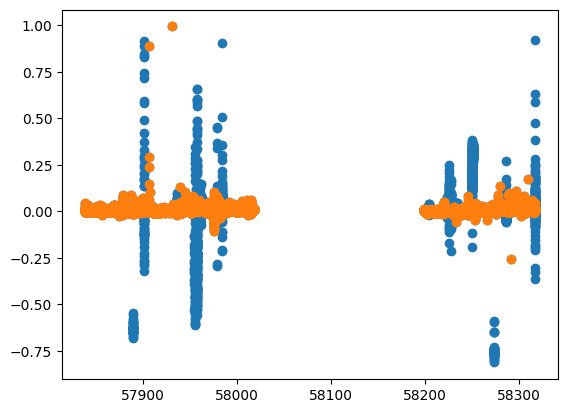

read in Data/astep/betapic_astep_2017.csv and wrote out Data/astep/astep_all.fits


In [1]:
from astropy.io import ascii
from astropy.table import Table, vstack
import numpy as np

## astep data
fname_astep17 = 'Data/astep/betapic_astep_2017.csv'
fname_astep18 = 'Data/astep/betapic_astep_2018.csv'

fname_out = 'Data/astep/astep_all.fits'

data_astep17 = ascii.read(fname_astep17)
data_astep18 = ascii.read(fname_astep18)

data_all = vstack([data_astep17, data_astep18])

# filter out sun elevation, bad photometry flag, sky ackground

m_elev = (data_all['SUNELEV']<-15.)
m_sky  = ( (data_all['SKY']/200.) < 1)

m_all = (m_elev * m_sky * data_all['FLAG']).astype('bool')

t_astep_masked = data_all['BJD'][m_all]
f_astep_masked = data_all['FCAL1'][m_all] - 1.

# mask out bad days that haven't been flagged previously

bad = {(58316.6, 58320.),
       (57899.5, 57890.5),
       (57900.6, 57902.5),
       (57936.0, 57936.3),
       (57954.6, 57958.0),
       (57978.0, 57978.7),
       (57983.6, 57984.3), 
       (58203.5, 58204.6),
       (58222.6, 58223.6),
       (58233.6, 58234.6),
       (58224.7, 58227.6),
       (58243.6, 58244.6),
       (58248.63, 58250.6),
       (58272.7, 58274.0),
       (58286.0, 58286.8),
       (57889.5, 57891.3),
       (57960.3, 57962.6),
       (58285.6, 58286.7)}
badmask = (np.ones_like(t_astep_masked)).astype('bool')

for (ts,te) in bad:
    badmask[(t_astep_masked>ts)*(t_astep_masked<te)] = False

import matplotlib.pyplot as plt
fig, ax = plt.subplots()
plt.scatter(t_astep_masked,f_astep_masked)
plt.scatter(t_astep_masked[badmask],f_astep_masked[badmask])
plt.draw()
plt.show()

t = Table([t_astep_masked, f_astep_masked], names=('time','flux'))

t.write(fname_out, overwrite=True)
print('read in {} and wrote out {}'.format(fname_astep17,fname_out))
